In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
con = sqlite3.connect(r'C:\projects\Cafe\cafe.db')

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_sql("select * from cafe_all_time", con)

In [5]:
df = df.rename(columns={'Group': 'group', 'On-Group': 'on-group'})

In [6]:
conditions = [
    df['Mnth'].isin(['Март', 'Апрель', 'Май']),
    df['Mnth'].isin(['Июнь', 'Июль', 'Август']),
    df['Mnth'].isin(['Сентябрь', 'Октябрь', 'Ноябрь']),
    df['Mnth'].isin(['Декабрь', 'Январь', 'Февраль']),
]
choices = ['Весна', 'Лето', 'Осень', 'Зима']

In [7]:
df['seasons'] = np.select(conditions, choices)

In [8]:
df['seasons'] = df['seasons'].astype('category')

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
day_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

In [11]:
df['day'] = df['datetime'].dt.day_name(locale='ru_Ru')

In [12]:
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)

In [13]:
df['hour'] = df['datetime'].dt.hour

In [14]:
df['date'] = df['datetime'].dt.date
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['revenue'] = df['pr_bez_nds'] * df['amount']

In [16]:
df['mnth'] = df['datetime'].dt.month_name(locale='ru_Ru')

In [17]:
df = df.drop('Mnth', axis=1)

In [18]:
month_order = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 
               'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

In [19]:
df['mnth'] = pd.Categorical(df['mnth'], categories=month_order, ordered=True)

In [20]:
df.head()

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth
0,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Яичница с беконом,181.00,45.00,37.50,22.95,14.55,1.00,1,181.00,card,92970 - 6916860058096,Завтрак,Яичница,Зима,Вторник,8,2024-01-09,37.50,Январь
1,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Сосиски отварные,181.00,65.00,54.17,23.78,30.39,1.00,2,181.00,card,92970 - 6916860058096,Основное блюдо,Колбаски разные,Зима,Вторник,8,2024-01-09,54.17,Январь
2,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Каша овсяная на молоке,181.00,65.00,54.17,13.75,40.42,1.00,3,181.00,card,92970 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь
3,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Хлеб ржано-пшеничный,181.00,6.00,5.00,1.84,3.16,1.00,4,181.00,card,92970 - 6916860058096,Хлеб,Хлеб,Зима,Вторник,8,2024-01-09,5.00,Январь
4,6916860058096,92971,2024-01-09 08:07:00,Ранний завтрак,240,Каша рисовая на молоке,145.00,65.00,54.17,17.42,36.75,1.00,1,145.00,card,92971 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483044 entries, 0 to 483043
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   rnm            483044 non-null  int64         
 1   num_check      483044 non-null  int64         
 2   datetime       483044 non-null  datetime64[ns]
 3   time_eat       483044 non-null  object        
 4   smena          483044 non-null  int64         
 5   good           483044 non-null  object        
 6   total_chek     483044 non-null  float64       
 7   price          483044 non-null  float64       
 8   pr_bez_nds     483044 non-null  float64       
 9   avg_price      483044 non-null  float64       
 10  profit         483044 non-null  float64       
 11  amount         483044 non-null  float64       
 12  position_good  483044 non-null  int64         
 13  summa          483044 non-null  float64       
 14  payment        483044 non-null  object        
 15  

In [22]:
df_data = df

In [23]:
df_data.head()

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth
0,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Яичница с беконом,181.00,45.00,37.50,22.95,14.55,1.00,1,181.00,card,92970 - 6916860058096,Завтрак,Яичница,Зима,Вторник,8,2024-01-09,37.50,Январь
1,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Сосиски отварные,181.00,65.00,54.17,23.78,30.39,1.00,2,181.00,card,92970 - 6916860058096,Основное блюдо,Колбаски разные,Зима,Вторник,8,2024-01-09,54.17,Январь
2,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Каша овсяная на молоке,181.00,65.00,54.17,13.75,40.42,1.00,3,181.00,card,92970 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь
3,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Хлеб ржано-пшеничный,181.00,6.00,5.00,1.84,3.16,1.00,4,181.00,card,92970 - 6916860058096,Хлеб,Хлеб,Зима,Вторник,8,2024-01-09,5.00,Январь
4,6916860058096,92971,2024-01-09 08:07:00,Ранний завтрак,240,Каша рисовая на молоке,145.00,65.00,54.17,17.42,36.75,1.00,1,145.00,card,92971 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь


In [24]:
def quart(value):
    if value in ['Январь', 'Февраль', 'Март']:
        return '1 Квартал'
    elif value in ['Апрель', 'Май', 'Июнь']:
        return '2 Квартал'
    elif value in ['Июль', 'Август', 'Сентябрь']:
        return '3 Квартал'
    else:
        return '4 Квартал'

In [25]:
df_data['quart'] = df_data['mnth'].apply(quart)

In [26]:
df_data.tail()

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart
483039,6916962051742,19202,2024-10-31 18:00:00,Скидки,194,Греча с грибами и луком,294.00,48.00,40.00,16.75,23.25,1.00,4,294.00,card,19202 - 6916962051742,Гарнир,Греча,Осень,Четверг,18,2024-10-31,40.00,Октябрь,4 Квартал
483040,6916962051742,19203,2024-10-31 18:04:00,Скидки,194,Стейк из свиной шеи,338.00,122.70,102.25,91.09,11.16,1.00,1,338.00,card,19203 - 6916962051742,Основное блюдо,Блюда из свинины,Осень,Четверг,18,2024-10-31,102.25,Октябрь,4 Квартал
483041,6916962051742,19203,2024-10-31 18:04:00,Скидки,194,Филе куриное запеченное с грибами,338.00,92.65,77.21,42.93,34.28,2.00,2,338.00,card,19203 - 6916962051742,Основное блюдо,Блюда из курицы,Осень,Четверг,18,2024-10-31,154.42,Октябрь,4 Квартал
483042,6916962051742,19203,2024-10-31 18:04:00,Скидки,194,Крафт для горячего 500 мл,338.00,15.00,12.50,7.92,4.58,2.00,3,338.00,card,19203 - 6916962051742,Контейнер,Контейнер,Осень,Четверг,18,2024-10-31,25.00,Октябрь,4 Квартал
483043,6916962051742,19204,2024-10-31 18:08:00,Скидки,194,Кекс яблочный,48.00,48.00,40.00,23.67,16.33,1.00,1,48.00,card,19204 - 6916962051742,Десерты,Кекс,Осень,Четверг,18,2024-10-31,40.00,Октябрь,4 Квартал


In [27]:
df_data.to_pickle('C:\projects\Cafe\Analysis\data')

**Выручка за период**

In [28]:
df_revenue = df.groupby(['day'])['revenue'].sum()

C:\Users\Михаил\AppData\Local\Temp\ipykernel_2716\4007214576.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_revenue = df.groupby(['day'])['revenue'].sum()


In [29]:
df_revenue = df_revenue[df_revenue > 0]

In [30]:
df_revenue

day
Понедельник   7,221,250.03
Вторник       7,369,189.83
Среда         6,944,639.13
Четверг       7,232,305.03
Пятница       6,106,042.23
Суббота         138,359.48
Name: revenue, dtype: float64

<Axes: title={'center': 'Распределение выручки по месяцам'}, xlabel='day'>

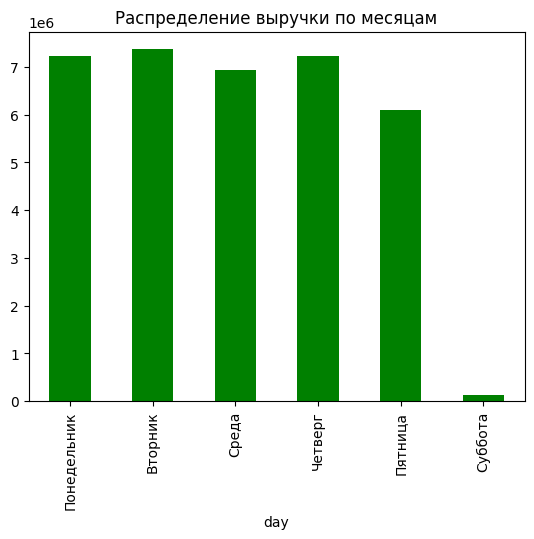

In [31]:
df_revenue.plot.bar(color='green', title='Распределение выручки по месяцам')

In [32]:
df_revenue.cumsum()

day
Понедельник    7,221,250.03
Вторник       14,590,439.86
Среда         21,535,078.99
Четверг       28,767,384.02
Пятница       34,873,426.25
Суббота       35,011,785.73
Name: revenue, dtype: float64